In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

Temperature = 23 degrees C

### Polarization Properties of the Generator and Receiver
With the transmitter and receiver facing each other along a straight goniometer track, rotate one horn
about its horizontal axis in 5¬∞ increments, and record the signal. Given that the receiver detects only one
polarization, how do you expect the detected signal to vary if the transmitted waves are linearly
polarized? Make a plot of this data; comment on if this is consistent with the data.

Call the angle relative to the upright position on this axis $\phi$.

We would expect the strength of the detected signal to vary sinusoidally if the transmitted waves are linearly polarized. Think of it like having a fixed vector which represents the polarization of a wave, then imagine another vector that can be rotated which represents the angle of the receiver. The projection of the first vector on the second depends on th cosine of the angle between them, which is the same as the sine with a phase shift.

In [3]:
phis = np.arange(0,185,5)
currents = [.50, .52, .50, .48, .48, .46, .42, .38, .36, .32, .28, .22, .18, .14, .10, .08, .02, .02, .00, .00, .02, .04, .06, .10, .16, .20, .24, .28, .32, .36, .40, .43, .46, .48, .50, .50, .52]
polardata = pd.DataFrame({'phi':phis, 'current': currents}, columns=['phi', 'current'])

Text(0.5,1,'current vs relative horn angle $\\phi$')

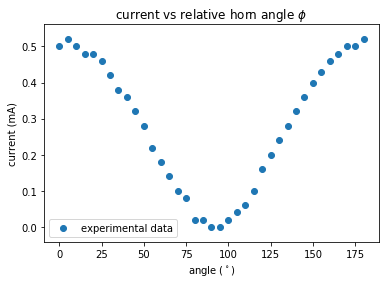

In [125]:
plt.scatter(polardata['phi'], polardata['current'], label='experimental data')
plt.xlabel(r'angle ($^\circ$)')
plt.ylabel('current (mA)')
plt.legend()
plt.title(r'current vs relative horn angle $\phi$')

The data does appear to behave as we predicted.

### Spatial Dependence of Transmitter Signal
Determine the dependence of the transmitter signal on the transmitter-receiver separation. Put the
transmitter and receiver facing each other along a straight goniometer track, with the same polarization
orientation for both. Start at a 45 cm separation and adjust the intensity/variable sensitivity dials on the
receiver so that the meter reads 1.00. Then move the source and receiver farther apart, taking receiver
readings at about 5 cm increments. From this data determine the r-dependence of the microwave
receiver signal. Create a plot of this data and fit it to the curve $Ar^n$. Report the values $A \pm \delta A$ and $n \pm \delta n$.

In [126]:
separations = np.arange(65, 115, 5)
currents = [1.00, .84, .78, .76, .66, .58, .56, .52, .52, .48]
spatialdata = pd.DataFrame({'separation':separations, 'current': currents}, columns=['separation', 'current'])

In [127]:
def f(r, A, n):
    return A*r**n

In [128]:
params, cov = curve_fit(f, spatialdata['separation'], spatialdata['current'])

In [129]:
def f(r):
    return params[0]*r**params[1]

In [130]:
est = f([r for r in spatialdata['separation']])

In [131]:
std = np.sqrt(np.diag(cov))

The fitted equation is $344 r^{-1.4}$

$A = 344 \pm 114$

$r = -1.4 \pm .076$.

Text(0.5,1,'current vs horn separation')

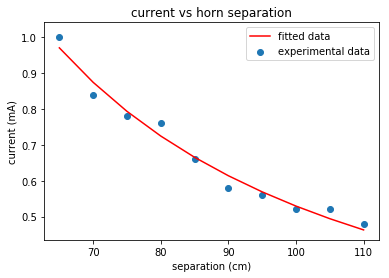

In [132]:
plt.scatter(spatialdata['separation'], spatialdata['current'], label='experimental data')
plt.plot(spatialdata['separation'], est, c=(1,0,0), label='fitted data')
plt.xlabel('separation (cm)')
plt.ylabel('current (mA)')
plt.legend()
plt.title('current vs horn separation')

The strength of the detected signal is likely theoretically inversely proportional to the separation. Inconsistencies between this prediction and the experimentally determined $I_{detected} \propto r^{-1.4}$ is likely due to inaccuracies in the experiment.

### Angular Dependence of Transmitter Signal
Place the transmitter directly over the protractor plate of the goniometer and position the receiver at
the far end of the other arm. Rotate the receiver arm to study the angular dependence of the
microwave signal radiated from the transmitter in 10 degree increments. What you want is the angular 
dependence of the microwave signal in the equatorial plane of the dipole source. Make sure you have
both the transmitter and detector oriented with their polarizations vertical. Make a plot of this data.
From the spatial and angular measurements, do you conclude that the waves are plane waves or
spherical waves? (Even though the signal is not proportional to intensity, you can assume that they
share the same r-dependence.) See the Appendix for a bit more on spherical and plane waves.

Call the angle relative to the upright position on this axis $\theta$.

In [133]:
sep = 60
thetas = np.arange(0, 100, 10)
currents = [1.00, .68, .32, .12, .04, .00, .00, .00, .00, .00]
angulardata = pd.DataFrame({'theta':thetas, 'current': currents}, columns=['theta', 'current'])

Text(0.5,1,'current vs relative horn angle $\\theta$')

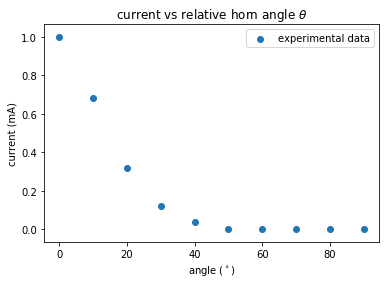

In [134]:
plt.scatter(angulardata['theta'], angulardata['current'], label='experimental data')
plt.xlabel(r'angle ($^\circ$)')
plt.ylabel('current (mA)')
plt.legend()
plt.title(r'current vs relative horn angle $\theta$')

Since the intensity of the detected signal is inversely proportional to the separation, and planar waves have no such deterioration in intensity, the waves are not planar. Since the intensity also deteriorates with an increasing angle between the detector and the transmitter, the waves are also not spherical. (I think they're maybe cylindrical.)

### Explore Polarization Phenomenon
Start with the receiver and transmitter horns orthogonally oriented about their axes so the measured
receiver signal is a minimum (‚Äúcrossed‚Äù transmitter and receiver). Then place the slotted metal sheet
polarizer in front of the transmitter horn and record the signal as you rotate the polarizer about the axis
between transmitter and receiver in 10 degree increments. (One of the horns has a protractor scale to
make this measurement easier.) Make a plot of the data and fit it to a sine or cosine function
appropriately. Does the slotted sheet simply block polarization perpendicular to the slots, or is
something more complicated happening? What physical model might explain the observations?

Call the angle relative to the upright position on this axis $\psi$.

In [135]:
sep = 60
psis = np.concatenate((np.arange(0, 50, 10), np.array([45]), np.arange(50, 70, 10)), axis=0)
currents = [.00, .06, .10, .58, .80, .86, .90, .82] 
angulardata = pd.DataFrame({'psi':psis, 'current': currents}, columns=['psi', 'current'])

In [136]:
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

In [137]:
res = fit_sin(angulardata['psi'], angulardata['current'])

In [138]:
est = res['fitfunc'](angulardata['psi'])

In [139]:
std = np.sqrt(np.diag(res['rawres'][2]))

$f(\psi) = A \sin{(\omega \psi + \phi)} + c$ (different $\phi$ than previous problems)

The fitted equation is $-0.467 \sin{(0.070 \psi + 1.172)} + 0.446$

$A = -0.467 \pm .031$

$\omega = 0.070 \pm .006$

$\phi = 1.172 \pm .214$

$c = 0.446 \pm .028$

Text(0.5,1,'current vs relative horn angle $\\psi$')

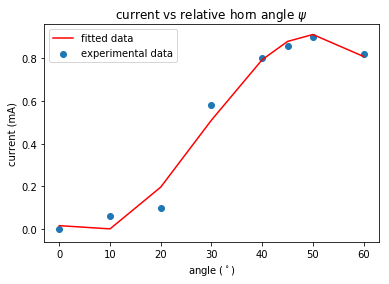

In [140]:
plt.scatter(angulardata['psi'], angulardata['current'], label='experimental data')
plt.plot(angulardata['psi'], est, c=(1,0,0), label='fitted data')
plt.xlabel(r'angle ($^\circ$)')
plt.ylabel('current (mA)')
plt.legend()
plt.title(r'current vs relative horn angle $\psi$')

We did this one in two ways, first by rotated the polarizer (above) and the second by rotating the transmitter (below).

In [141]:
sep = 60
psis = np.concatenate((np.arange(0, 50, 10), np.array([45]), np.arange(50, 140, 10),np.array([135]), np.arange(140, 190, 10)), axis=0)
currents = [.08, .08, .08, .06, .04, .03, .02, .02, .01, .00, .00, .00, .00, .02, .03, .04, .04, .06, .06, .08, .08]
angulardata = pd.DataFrame({'psi':psis, 'current': currents}, columns=['psi', 'current'])

In [142]:
res = fit_sin(angulardata['psi'], angulardata['current'])

In [143]:
est = res['fitfunc'](angulardata['psi'])

In [144]:
std = np.sqrt(np.diag(res['rawres'][2]))

$f(\psi) = A \sin{(\omega \psi + \phi)} + c$ (different $\phi$ than previous problems)

The fitted equation is $0.043 \sin{(.033 \psi + 1.761)} + 0.040$

$A = 0.043 \pm .002$

$\omega = 0.033 \pm .002$

$\phi = 1.761 \pm .169$

$c = .040 \pm .003$

Text(0.5,1,'current vs relative horn angle $\\psi$')

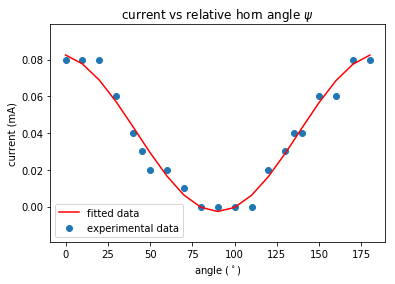

In [152]:
plt.scatter(angulardata['psi'], angulardata['current'], label='experimental data')
plt.plot(angulardata['psi'], est, c=(1,0,0), label='fitted data')
plt.xlabel(r'angle ($^\circ$)')
plt.ylabel('current (mA)')
plt.legend()
plt.title(r'current vs relative horn angle $\psi$')

The detected intensity of the signal varies sinusoidally like vector projections, so it seems that instead of blocking waves that are perpendicular to it, the polarizer blocks the perpendicular **components** of all of the waves that pass through it.

Because the transmitted wave will have absolutely no component in the direction of the receiver's detection direction, the receiver simply will not detect anything. However, when the slotted metal plate was added, a signal was detected. According to Malus' law, 
$I=I_{max}\cos^2{\phi}$

Given that the plate and transmitter were initially perpendicular, Malus' law states that the intensity measured would be zero at 90 degrees, which it was, and it increased to it's maximum when the transmitter was at 0 and 180 degrees and produced waves parallel to the slots in the plate, meaning that the plate did simply block polarization.

### Explore Reflection Phenomena
Verify that microwaves incident on a metal plate follow the law of specular reflection. With the
transmitter at one end of one goniometer track, and the receiver at the other, set a fixed angle between
the two tracks somewhere between 70 degrees and 110 degrees. Mount a solid metal plate on the
goniometer protractor. Now record the detected signal while rotating the metal plate in 10 degree
increments, keeping the angle between the transmitter and receiver fixed. Submit a plot of this
experiment.

*Data for this section was collected by Aidan McGirr's group as this section was accidentally ommitted on account of the lab manual change.*

In [160]:
angles = [90, 100, 110, 120, 130, 140, 150, 160, 170, 180]
currents = [0, .01, .03, .04, .39, .2, .03, 0, 0, 0]

In [161]:
reflectordata = pd.DataFrame({'angle':angles, 'current':currents}, columns=['angle', 'current'])

Text(0.5,1,'current vs angle with reflector')

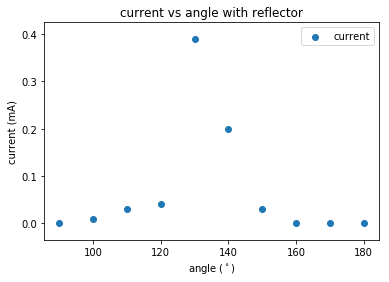

In [162]:
plt.scatter(reflectordata['angle'], reflectordata['current'])
plt.xlabel(r'angle ($^\circ$)')
plt.ylabel('current (mA)')
plt.legend()
plt.title(r'current vs angle with reflector')

### Use Standing Waves to Measure the Wave Speed
Mount a metal plate on the goniometer's receiver arm to reflect the microwaves directly back into the
transmitter. This can give rise to standing waves between the transmitter horn and the reflector plate.
Detect them by mounting the detector probe between the transmitter and reflector and connecting its
output to the receiver. The meter now reads the signal at the probe‚Äôs position. Adjust the positions of
the transmitter and reflector to get a strong standing wave, and then map out the standing wave signal
with the detector probe. Record the position(s) at which signal minima are observed, and use this to
determine the microwave wavelength. Combine this result with the known generator frequency (10.5
GHz) to determine the speed of microwave propagation.
Make a plot of your data to visualize the standing wave and report the wave speed as ùúà ¬± ùõøùúà with
appropriate units. Does this number look familiar? For a perfect standing wave pattern, what should
the wave amplitudes be at the reflector and transmitter ends (are they nodes or antinodes)?

*Data for this section was collected by Madison Grayson's group as the standing wave generated by this group did not produce multiple extrema.*

In [163]:
positions = [30.5, 30.6, 30.7, 30.8, 30.9, 31, 31.1, 31.2, 31.3, 31.4, 31.5, 32, 32.5, 33, 33.5, 33.6, 33.7,
             33.8, 33.9, 34, 34.5, 35, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36, 36.5, 37]
currents = [0.38, 0.42, 0.42, 0.42, 0.48, 0.43, 0.5, 0.56, 0.56, 0.53, 0.48, 0.46, 0.48, 0.4, 0.46, 0.48,
            0.52, 0.53, 0.52, 0.46, 0.34, 0.34, 0.38, 0.39, 0.39, 0.36, 0.38, 0.36, 0.34, 0.3, 0.24, 0.28, 0.36, 0.43]

In [164]:
standwaves = pd.DataFrame({'position':positions, 'current':currents}, columns=['position', 'current'])

In [155]:
standwaves

position  current
0       30.5     0.38
1       30.6     0.42
2       30.7     0.42
3       30.8     0.42
4       30.9     0.48
5       31.0     0.43
6       31.1     0.50
7       31.2     0.56
8       31.3     0.56
9       31.4     0.53
10      31.5     0.48
11      32.0     0.46
12      32.5     0.48
13      33.0     0.40
14      33.5     0.46
15      33.6     0.48
16      33.7     0.52
17      33.8     0.53
18      33.9     0.52
19      34.0     0.46
20      34.5     0.34
21      35.0     0.34
22      35.1     0.38
23      35.2     0.39
24      35.3     0.39
25      35.4     0.36
26      35.5     0.38
27      35.6     0.36
28      35.7     0.34
29      35.8     0.30
30      35.9     0.24
31      36.0     0.28
32      36.5     0.36
33      37.0     0.43

Text(0.5,1,'current vs position in a standing wave')

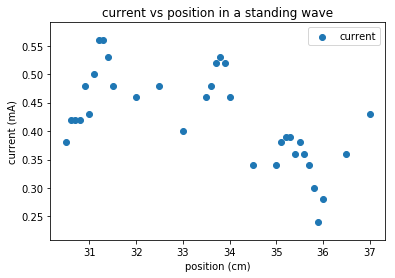

In [157]:
plt.scatter(standwaves['position'], standwaves['current'])
plt.xlabel(r'position (cm)')
plt.ylabel('current (mA)')
plt.legend()
plt.title(r'current vs position in a standing wave')

In [168]:
res = fit_sin(standwaves['position'], standwaves['current'])

In [169]:
est = res['fitfunc'](standwaves['position'])

In [170]:
std = np.sqrt(np.diag(res['rawres'][2]))

Text(0.5,1,'current vs position in a standing wave')

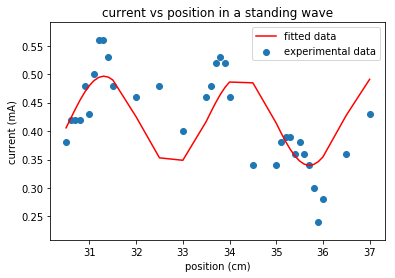

In [173]:
plt.scatter(standwaves['position'], standwaves['current'], label='experimental data')
plt.plot(standwaves['position'], est,c=(1,0,0), label='fitted data')
plt.xlabel(r'position (cm)')
plt.ylabel('current (mA)')
plt.legend()
plt.title(r'current vs position in a standing wave')

The fitted equation is $I(r) = .078 \sin{(2.141\theta - 8.921)} + .418$.

$A = 0.078 \pm .015$

$\omega = 2.141 \pm .097$

$\phi = 8.921 \pm 3.256$

$c = .418 \pm .011$

### Bonus
Calculate the E-field and B-fields at the reflection plate? Is there any surface charge
density ùúé on the plate? Submit a plot ùúé in the plane.

### Submission
This lab is an exploration lab, hence a full lab report is not required. Submit a homework style
assignment answering all questions, rendering all plots, and calculating all quantiles assigned. All
measurements must be reported with uncertainty ‚Äì if you are using a plot to report your data use error
bars for each measured point ‚Äì and all calculated quantities must be reported with uncertainty as well.